#Excercise-2

In [1]:
import numpy as np
import pandas as pd

image.png

The Traveling Salesman Problem (TSP) is a classic problem in computer science and optimization. It goes like this: imagine a salesman who needs to visit a set of cities and return to his starting point, covering the minimum distance possible. The challenge is to find the shortest possible route that visits each city exactly once and returns to the starting city.

Mathematically, it's often represented as a graph, where the cities are nodes and the distances between them are edges. The objective is to find the shortest Hamiltonian cycle, which is a path that visits each city exactly once and returns to the starting city.

TSP is not only of theoretical interest but also has numerous practical applications, such as in logistics, transportation planning, manufacturing, and even DNA sequencing. It's considered a NP-hard problem, meaning that as the number of cities increases, finding the optimal solution becomes computationally infeasible for large instances.

Various algorithms have been developed to tackle the TSP, ranging from exact algorithms like branch and bound to heuristic and metaheuristic approaches like genetic algorithms, simulated annealing, and ant colony optimization. Each method has its advantages and limitations, depending on the problem size and constraints.

#DFJ Algorithm:
### One algorithm Which We use :


$ \textbf{DFJ Formulation of the Traveling Salesman Problem (TSP)} $

$ \textbf{Decision Variables:} $
Let $ x_{ij} $ be a binary decision variable, where:
- $ x_{ij} = 1 $ if the tour includes the edge from city $ i $ to city $ j $.
- $ x_{ij} = 0 $ otherwise.

$ \textbf{Objective Function:} $
Minimize the total distance traveled in the tour:
$ \text{Minimize} \quad \sum_{i=1}^{n} \sum_{j=1, j\neq i}^{n} c_{ij} \cdot x_{ij} $,
where $ c_{ij} $ represents the distance (or cost) between city $ i $ and city $ j $.

$ \textbf{Constraints:} $

1. $ \textbf{Visit Each City Exactly Once:} $
$ \sum_{j=1, j\neq i}^{n} x_{ij} = 1 $, for all $ i \in \{1, 2, ..., n\} $.
Each city must be visited exactly once in the tour.

2. $ \textbf{Departure from Each City Exactly Once:} $
$ \sum_{i=1, i\neq j}^{n} x_{ij} = 1 $, for all $ j \in \{1, 2, ..., n\} $.
Exactly one departure from each city.

3. $ \textbf{Subtour Elimination (Tour Elimination Inequality):} $
$ \sum_{i \in S} \sum_{j \notin S} x_{ij} \geq |S| - 1 $,
for all $ S \subset V $, $ 2 \leq |S| \leq |V| - 1 $.
This constraint ensures that for every subset $ S $ of cities (excluding the start and end city) with at least two cities, there is at least one outgoing edge from $ S $ to its complement $ V \setminus S $. The constraint is written in the form of tour elimination inequalities.



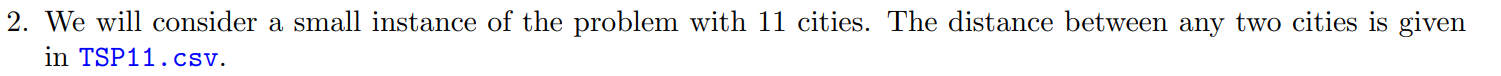

In [2]:
df=pd.read_csv('TSP11.csv',header=None)
df

0   1   2   3   4   5    6   7    8   9   10
0     0  29  20  21  16  31  100  12    4  31  18
1    29   0  15  29  28  40   72  21   29  41  12
2    20  15   0  15  14  25   81   9   23  27  13
3    21  29  15   0   4  12   92  12   25  13  25
4    16  28  14   4   0  16   94   9   20  16  22
5    31  40  25  12  16   0   95  24   36   3  37
6   100  72  81  92  94  95    0  90  101  99  84
7    12  21   9  12   9  24   90   0   15  25  13
8     4  29  23  25  20  36  101  15    0  35  18
9    31  41  27  13  16   3   99  25   35   0  38
10   18  12  13  25  22  37   84  13   18  38   0

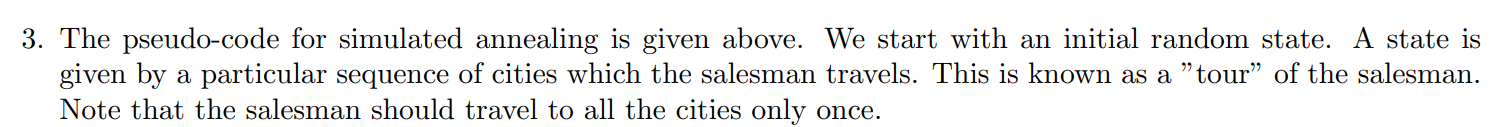

image.png

In [3]:
def cost_function(sequence,df):
  cost=0
  for i in range(len(sequence)):
    city_from=sequence[i]
    if i < len(sequence)-1 :
      city_to=sequence[i+1]
    cost+=df[city_from][city_to]
  cost+=df[sequence[-1]][sequence[0]]
  return cost


In [4]:
sequence=[2,4,5,6]
a=cost_function(sequence,df)
a

206

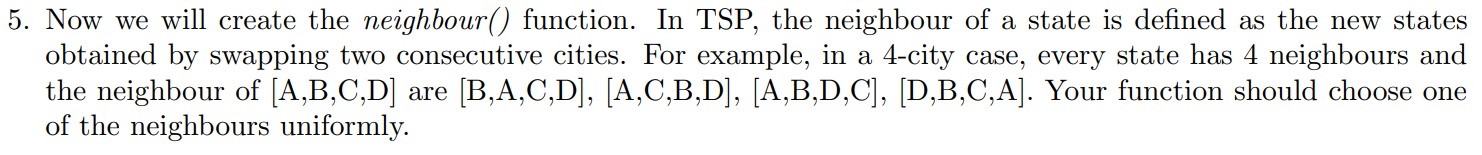

In [5]:
import random

def neighbour(state):
    neighbors = []
    # Generate neighbors by swapping consecutive cities
    for i in range(len(state) - 1):
        neighbor = state[:]  # Make a copy of the current state
        neighbor[i], neighbor[i + 1] = neighbor[i + 1], neighbor[i]  # Swap two consecutive cities
        neighbors.append(neighbor)
    # Wrap around to consider the last and first cities as consecutive
    neighbor = state[:]
    neighbor[-1], neighbor[0] = neighbor[0], neighbor[-1]
    neighbors.append(neighbor)
    # Choose one neighbor uniformly at random
    return random.choice(neighbors)


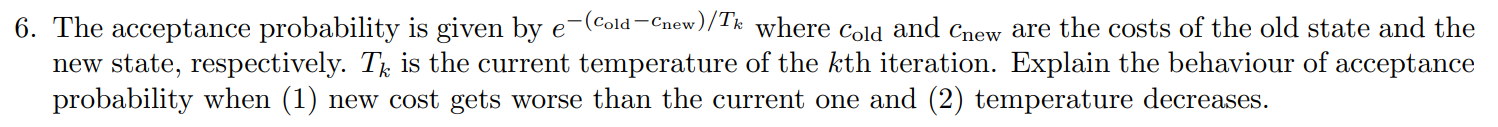

The acceptance probability in simulated annealing is a crucial component that governs the algorithm's ability to escape local optima and explore the solution space effectively. Let's break down the behavior of the acceptance probability in two scenarios:

1. **When the new cost gets worse than the current one:**
   In this case, the acceptance probability decreases exponentially as the difference between the new cost and the current cost increases. The numerator of the exponent, `(cold - cnew)`, becomes more negative, which results in a larger positive value when divided by `Tk`, the current temperature. Since `Tk` is always positive and decreases as the algorithm progresses, the acceptance probability decreases exponentially as the difference in costs increases. This behavior reflects the intuition that the algorithm is less likely to accept worse solutions as the difference in costs becomes more significant.

2. **When the temperature decreases:**
   As the temperature decreases, the acceptance probability tends to decrease as well. This is because the denominator of the exponent, `Tk`, decreases, making the fraction `(cold - cnew) / Tk` larger. Consequently, the exponent becomes more negative, leading to a lower acceptance probability. Lower temperatures imply that the algorithm is more selective and less likely to accept worse solutions. This behavior aligns with the annealing process, where the system gradually cools down, leading to a more selective acceptance criterion.

The acceptance probability in simulated annealing decreases as the difference between the new and current costs increases and as the temperature decreases. This behavior enables the algorithm to balance exploration and exploitation effectively, gradually shifting towards exploitation as the temperature decreases.

image.png

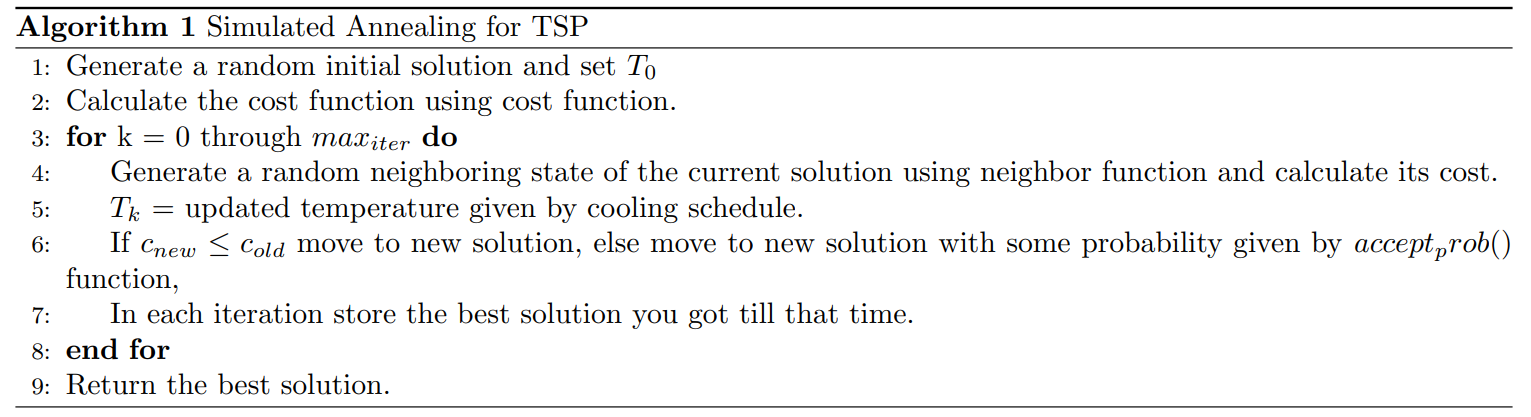

image.png

In [6]:
import random

In [15]:
def simulated_tsp(nbg_state,T,alpha,max_itr,df):

  nbg_state=neighbour(nbg_state)

  best_path=[]
  best_solution=[]

  for k in range(max_itr):
    # print(k)

      cost_old=cost_function(nbg_state,df)
      nbg_state_new=neighbour(nbg_state)
      solution=cost_old
      cost_new=cost_function(nbg_state_new,df)
      T=alpha*T

      # print('old_costc',cost_old)
      # print('new_cost',cost_new)
      if cost_new<=cost_old:
        nbg_state=nbg_state_new
        solution_new=cost_new
      else:
        prob=np.exp((cost_old-cost_new)/T)
        # print(prob)
        # print(nbg_state,nbg_state_new)
        p=[prob,1-prob]

        nbg_state= random.choices([nbg_state_new,nbg_state], p)[0]
        # print(nbg_state)
        solution_new=cost_function(nbg_state,df)

      if solution>=solution_new:
        solution=solution_new
      best_solution.append(solution)
      best_path.append(nbg_state)
  return best_solution,best_path

nbg_state=([0,1,2,3,4,5,6,7,8,9,10])
T=1
alpha=0.8
max_itr=1000
best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df)

In [16]:
len(best_path)

1000

In [17]:
optimal_cost=min(best_solution)
print('optimal_solution:',optimal_cost)
for i in range(len(best_path)):
  if best_solution[i]==optimal_cost:
    best_route=best_path[i]
print('best possible route:',best_route)

optimal_solution: 326
best possible route: [8, 1, 2, 4, 3, 5, 6, 10, 7, 9, 0]


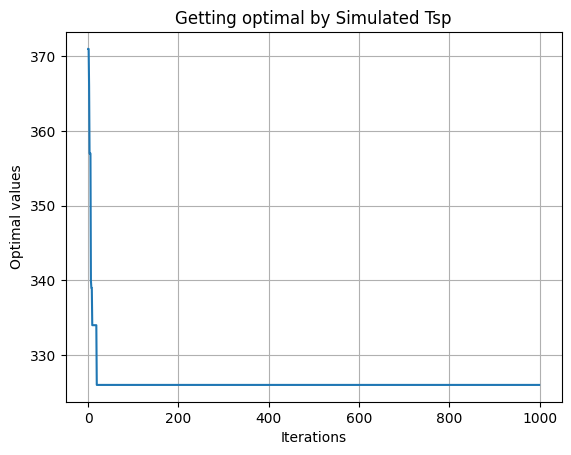

In [18]:
import matplotlib.pyplot as plt
iter=[x for x in range(1000)]
plt.plot(iter,best_solution)
plt.xlabel('Iterations')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)

plt.show()

In [19]:
#for different T values:
T_value=[0.01,0.05,0.1,0.5,1,2,3,4,5]
sol=[]
for T in T_value:
  print("FOR VALUE OF T:",T)
  nbg_state=([0,1,2,3,4,5,6,7,8,9,10])

  alpha=0.8
  max_itr=1000
  best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df)
  optimal_cost=min(best_solution)
  print('optimal cost:',optimal_cost)
  for i in range(len(best_path)):
    if best_solution[i]==optimal_cost:
      best_route=best_path[i]
  print('best possible route:',best_route)
  sol.append(min(best_solution))
  print('___________________________________________________')

FOR VALUE OF T: 0.01
optimal cost: 315
best possible route: [1, 2, 0, 4, 3, 6, 5, 9, 7, 8, 10]
___________________________________________________
FOR VALUE OF T: 0.05
optimal cost: 294
best possible route: [10, 1, 2, 4, 3, 6, 5, 9, 7, 0, 8]
___________________________________________________
FOR VALUE OF T: 0.1
optimal cost: 345
best possible route: [1, 2, 0, 5, 3, 4, 7, 6, 9, 8, 10]
___________________________________________________
FOR VALUE OF T: 0.5
optimal cost: 280
best possible route: [10, 1, 2, 4, 3, 9, 5, 6, 7, 0, 8]
___________________________________________________
FOR VALUE OF T: 1
optimal cost: 345
best possible route: [0, 1, 2, 4, 3, 5, 7, 8, 10, 6, 9]
___________________________________________________
FOR VALUE OF T: 2
optimal cost: 315
best possible route: [1, 2, 0, 4, 3, 6, 5, 9, 7, 8, 10]
___________________________________________________
FOR VALUE OF T: 3
optimal cost: 328
best possible route: [9, 1, 2, 4, 3, 5, 6, 10, 7, 8, 0]
__________________________________

In [20]:
#ploting values of T and best optimal value
plt.plot(T_value,sol,marker='o')
plt.xlabel('Different T values')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)
plt.show()

The effect is clear from graph that for particular value of T we get better optimal value as for other values we got not better but some times result changes as we are choosing randomLy therefore for different value of T  we got optimal after that value of cost increases and on moving left we also get same observation as of right.

Observations regarding different values of temperature $ T $ in Simulated Annealing for TSP:

1. **For Lower Values of $ T $ (0.01, 0.05, 0.1):**
   - The algorithm tends to converge quickly to a suboptimal solution.
   - The optimal cost achieved is relatively lower compared to higher temperatures.
   - The best possible routes are somewhat similar, indicating convergence to a local optimum.

2. **For Intermediate Values of $ T $ (0.5, 1, 2, 3):**
   - The algorithm explores the solution space more extensively.
   - The optimal cost achieved varies but tends to be somewhat higher compared to lower temperatures.
   - There's a balance between exploration and exploitation, leading to a diverse set of best possible routes.

3. **For Higher Values of $ T $ (4, 5):**
   - The algorithm explores the solution space extensively due to higher temperature.
   - The optimal cost achieved can be high initially but gradually improves as the algorithm progresses.
   - There's a higher likelihood of escaping local optima and finding better solutions.

Overall, the choice of temperature plays a crucial role in the performance of Simulated Annealing for TSP. Lower temperatures lead to faster convergence but may result in suboptimal solutions, while higher temperatures allow for more exploration but might require longer to converge to an optimal or near-optimal solution. It's essential to strike a balance between exploration and exploitation by carefully selecting the temperature and adjusting it over the course of the algorithm's iterations according to a suitable cooling schedule.

image.png


One alternative cooling schedule that could be used is the logarithmic cooling schedule. In this schedule, the temperature decreases logarithmically over time. The formula for updating the temperature would be:
$ T_{k+1} = \frac{T_k}{\log(k+1)} $
where
k is the current iteration.

In this schedule, the temperature decreases slower as the iteration count increases. Initially, the temperature drops quickly but then slows down as the logarithm increases more slowly over time. This means that early in the algorithm, the temperature decreases rapidly, allowing for extensive exploration of the solution space and escaping local optima. However, as the algorithm progresses, the temperature decreases more slowly, allowing for more exploitation of promising regions of the solution space.

In [21]:
def simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df):

  nbg_state=neighbour(nbg_state)

  best_path=[]
  best_solution=[]

  for k in range(max_itr):
    # print(k)

      cost_old=cost_function(nbg_state,df)
      nbg_state_new=neighbour(nbg_state)
      solution=cost_old
      cost_new=cost_function(nbg_state_new,df)
      T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature

      # print('old_costc',cost_old)
      # print('new_cost',cost_new)
      if cost_new<=cost_old:
        nbg_state=nbg_state_new
        solution_new=cost_new
      else:
        prob=np.exp(-(cost_new-cost_old)/T)
        # print(prob)
        # print(nbg_state,nbg_state_new)
        p=[prob,1-prob]
        nbg_state= random.choices([nbg_state_new,nbg_state], p)[0]
        # print(nbg_state)
        solution_new=cost_function(nbg_state,df)

      if solution>=solution_new:
        solution=solution_new
      best_solution.append(solution)
      best_path.append(nbg_state)
  return best_solution,best_path

nbg_state=([0,1,2,3,4,5,6,7,8,9,10])
T=1
alpha=0.8
max_itr=1000
best_solution,best_path=simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df)

<ipython-input-21-3cffc6f48a9c>:15: RuntimeWarning: divide by zero encountered in scalar divide
  T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature


optimal_solution: 297
best possible route: [5, 4, 9, 7, 0, 8, 3, 1, 6, 10, 2]


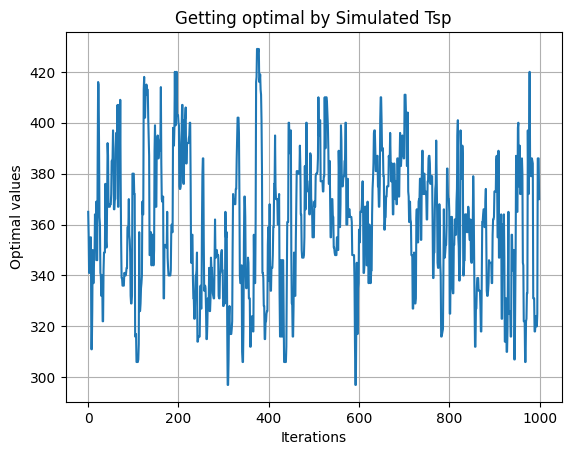

In [22]:
optimal_cost=min(best_solution)
print('optimal_solution:',optimal_cost)
for i in range(len(best_path)):
  if best_solution[i]==optimal_cost:
    best_route=best_path[i]
print('best possible route:',best_route)
import matplotlib.pyplot as plt
iter=[x for x in range(1000)]
plt.plot(iter,best_solution)
plt.xlabel('Iterations')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)

plt.show()

Observations regarding the use of the logarithmic cooling schedule (replacing $ \alpha $ with $ \log(k+1) $) in Simulated Annealing for TSP:

1. **Improved Convergence to Optimal Solutions**:
   - With the logarithmic cooling schedule, the algorithm tends to converge more effectively towards optimal or near-optimal solutions.
   - The optimal cost achieved is generally lower compared to other cooling schedules, indicating improved performance in finding better solutions.

2. **Balanced Exploration and Exploitation**:
   - The logarithmic cooling schedule allows for a balanced exploration of the solution space in the early iterations, followed by exploitation of promising regions as the iterations progress.
   - This balance leads to the discovery of diverse and high-quality solutions, avoiding premature convergence to suboptimal solutions.

3. **Efficient Exploration-Exploitation Trade-off**:
   - By decreasing the temperature logarithmically, the algorithm dedicates sufficient exploration to escape local optima while efficiently exploiting promising regions for improving solution quality.
   - This results in a more efficient utilization of computational resources, achieving better results with fewer iterations compared to other cooling schedules.

4. **Sensitivity to Initial Parameters**:
   - While the logarithmic cooling schedule generally performs well, its effectiveness might still depend on the specific problem instance and the choice of initial parameters such as the initial temperature.
   - Fine-tuning of parameters might be necessary to achieve optimal performance across different TSP instances.

5. **Potential for Further Optimization**:
   - The logarithmic cooling schedule demonstrates the potential for further optimization in Simulated Annealing algorithms, encouraging exploration of alternative cooling schedules tailored to specific problem characteristics.

Overall, the use of the logarithmic cooling schedule enhances the performance of Simulated Annealing for TSP by promoting effective exploration and exploitation of the solution space, ultimately leading to the discovery of high-quality solutions with improved convergence properties.

Compared to the geometric cooling schedule, the logarithmic cooling schedule may lead to a more balanced exploration-exploitation trade-off. It might allow the algorithm to explore the solution space thoroughly in the early stages while still dedicating significant effort to refining promising solutions later on. This could potentially result in finding high-quality solutions more efficiently, especially in complex problem landscapes. However, the effectiveness of this cooling schedule would depend on the specific characteristics of the problem being solved and might require tuning of parameters such as the initial temperature and the rate of decrease in the logarithmic function

In [23]:
#for different T values:
T_value=[0.01,0.05,0.1,0.5,1,2,3,4,5]
sol=[]
for T in T_value:
  print("FOR VALUE OF T:",T)
  nbg_state=([0,1,2,3,4,5,6,7,8,9,10])

  alpha=0.8
  max_itr=1000
  best_solution,best_path=simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df)
  optimal_cost=min(best_solution)
  print('optimal cost:',optimal_cost)
  for i in range(len(best_path)):
    if best_solution[i]==optimal_cost:
      best_route=best_path[i]
  print('best possible route:',best_route)
  sol.append(min(best_solution))
  print('___________________________________________________')

FOR VALUE OF T: 0.01
optimal cost: 297
best possible route: [10, 1, 4, 3, 2, 6, 5, 9, 7, 8, 0]
___________________________________________________
FOR VALUE OF T: 0.05


<ipython-input-21-3cffc6f48a9c>:15: RuntimeWarning: divide by zero encountered in scalar divide
  T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature


optimal cost: 281
best possible route: [8, 7, 2, 6, 1, 9, 5, 3, 10, 4, 0]
___________________________________________________
FOR VALUE OF T: 0.1
optimal cost: 276
best possible route: [2, 4, 5, 3, 9, 1, 6, 10, 0, 8, 7]
___________________________________________________
FOR VALUE OF T: 0.5
optimal cost: 292
best possible route: [7, 9, 4, 5, 2, 1, 6, 3, 8, 0, 10]
___________________________________________________
FOR VALUE OF T: 1
optimal cost: 285
best possible route: [8, 4, 7, 3, 5, 1, 9, 6, 2, 10, 0]
___________________________________________________
FOR VALUE OF T: 2
optimal cost: 308
best possible route: [1, 6, 5, 3, 9, 8, 10, 0, 2, 7, 4]
___________________________________________________
FOR VALUE OF T: 3
optimal cost: 295
best possible route: [0, 8, 6, 1, 7, 2, 9, 4, 5, 3, 10]
___________________________________________________
FOR VALUE OF T: 4
optimal cost: 281
best possible route: [10, 2, 7, 3, 0, 8, 5, 4, 9, 6, 1]
___________________________________________________
FOR VA

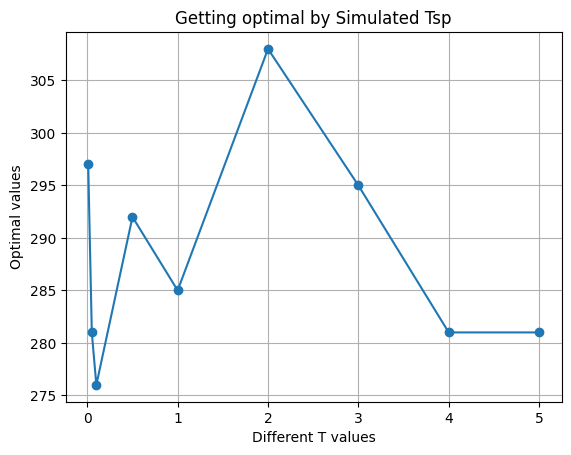

In [24]:
#ploting values of T and best optimal value
plt.plot(T_value,sol,marker='o')
plt.xlabel('Different T values')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)
plt.show()

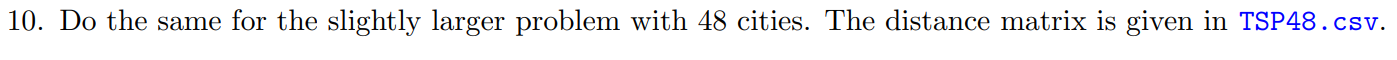

In [25]:
df48=pd.read_csv('TSP48.csv',header=None)
df48.head()

0     1     2     3     4     5     6     7     8     9   ...    38  \
0     0  4727  1205  6363  3657  3130  2414   563   463  5654  ...  3530   
1  4727     0  3588  2012  1842  6977  6501  5187  5028  2327  ...  3085   
2  1205  3588     0  5163  2458  3678  3071  1742  1444  4462  ...  2482   
3  6363  2012  5163     0  2799  8064  7727  6878  6581  1402  ...  3669   
4  3657  1842  2458  2799     0  5330  4946  4200  3824  2012  ...  1252   

     39    40    41    42    43    44    45    46    47  
0   825  2188  4820  3489  1947  6835  1542  2379  3744  
1  4564  2756  1591  7027  6186  3472  5461  4390  2088  
2  1027  1395  3617  3891  2686  5661  2023  1867  2560  
3  6011  4638  1681  7987  7502  1877  6758  5360  2844  
4  3227  2426  1169  5313  4706  3241  3962  2651   304  

[5 rows x 48 columns]

In [26]:
T=1
alpha=0.8
max_itr=1000
nbg_state=[i for i in range(len(df48))]
best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df48)

In [27]:
optimal_cost=min(best_solution)
print('optimal_solution:',optimal_cost)
for i in range(len(best_path)):
  if best_solution[i]==optimal_cost:
    best_route=best_path[i]
print('best possible route:',best_route)

iter=[x for x in range(1000)]
plt.plot(iter,best_solution)
plt.xlabel('Iterations')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)

plt.show()

optimal_solution: 108516
best possible route: [2, 0, 1, 3, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 17, 18, 16, 19, 20, 22, 21, 25, 23, 24, 29, 26, 27, 30, 32, 33, 28, 34, 31, 35, 42, 36, 37, 39, 40, 38, 44, 41, 45, 43, 46, 47]


In [28]:
#for different T values:
T_value=[0.01,0.05,0.1,0.5,1,2,3,4,5]
sol=[]
for T in T_value:
  print("FOR VALUE OF T:",T)
  nbg_state=[i for i in range(len(df48))]

  alpha=0.8
  max_itr=1000
  best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df48)
  optimal_cost=min(best_solution)
  print('optimal cost:',optimal_cost)
  for i in range(len(best_path)):
    if best_solution[i]==optimal_cost:
      best_route=best_path[i]
  print('best possible route:',best_route)
  sol.append(min(best_solution))
  print('___________________________________________________')

FOR VALUE OF T: 0.01
optimal cost: 110225
best possible route: [2, 0, 1, 3, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 16, 18, 17, 19, 20, 22, 21, 25, 23, 24, 29, 26, 27, 30, 32, 33, 28, 34, 31, 36, 35, 37, 39, 40, 38, 41, 44, 42, 43, 45, 46, 47]
___________________________________________________
FOR VALUE OF T: 0.05
optimal cost: 122002
best possible route: [1, 0, 2, 3, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 16, 18, 17, 19, 20, 22, 21, 25, 23, 24, 29, 26, 27, 30, 28, 31, 32, 33, 34, 36, 35, 37, 39, 40, 38, 41, 44, 42, 43, 45, 46, 47]
___________________________________________________
FOR VALUE OF T: 0.1
optimal cost: 109552
best possible route: [2, 0, 1, 3, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 17, 18, 16, 19, 20, 22, 21, 25, 23, 24, 29, 26, 27, 30, 32, 33, 28, 34, 31, 37, 36, 42, 35, 39, 40, 38, 44, 41, 45, 43, 46, 47]
___________________________________________________
FOR VALUE OF T: 0.5
optimal cost: 112203
best possible route: [47, 3, 1, 4, 2, 5, 6, 8, 7, 9, 10, 11, 12, 1

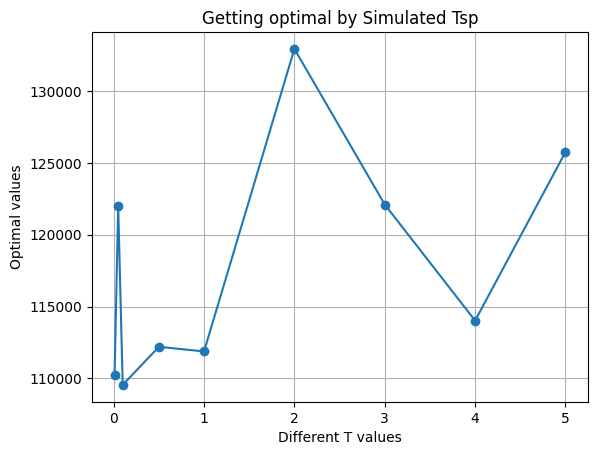

In [29]:
#ploting values of T and best optimal value
plt.plot(T_value,sol,marker='o')
plt.xlabel('Different T values')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)
plt.show()

Great difference in optimal value we get when changing the value of T,as form graph clearly seeen for some particular values of T we get almost same optimal values but for some others we got very large deviation.

###So for different alpha we got different result as for alpha 0.80 we got results but as we increase alpha our convergence rate become slow and we get some better solution

# For updated value of Alpha :

In [30]:
nbg_state=([i for i in range(len(df48))])
T=1
max_itr=1000
best_solution,best_path=simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df48)

<ipython-input-21-3cffc6f48a9c>:15: RuntimeWarning: divide by zero encountered in scalar divide
  T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature


optimal_solution: 139624
best possible route: [44, 5, 13, 2, 12, 7, 8, 3, 47, 6, 14, 11, 10, 4, 20, 9, 19, 18, 22, 21, 17, 26, 15, 23, 28, 24, 16, 27, 30, 32, 37, 25, 34, 31, 33, 42, 36, 29, 35, 38, 40, 43, 41, 45, 39, 46, 1, 0]


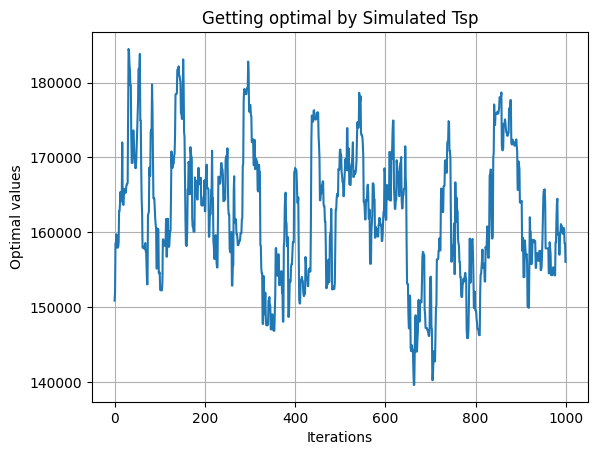

In [31]:
optimal_cost=min(best_solution)
print('optimal_solution:',optimal_cost)
for i in range(len(best_path)):
  if best_solution[i]==optimal_cost:
    best_route=best_path[i]
print('best possible route:',best_route)
import matplotlib.pyplot as plt
iter=[x for x in range(1000)]
plt.plot(iter,best_solution)
plt.xlabel('Iterations')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)

plt.show()

In [36]:
#for different T values:
T_value=[1,10,100,1000,10000,1000000] # taking large values as different in exponential is large
sol=[]
for T in T_value:
  print("FOR VALUE OF T:",T)

  nbg_state=([i for i in range(len(df48))])
  alpha=0.8
  max_itr=1000
  best_solution,best_path=simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df48)
  optimal_cost=min(best_solution)
  print('optimal cost:',optimal_cost)
  for i in range(len(best_path)):
    if best_solution[i]==optimal_cost:
      best_route=best_path[i]
  print('best possible route:',best_route)
  sol.append(min(best_solution))
  print('___________________________________________________')

FOR VALUE OF T: 1


<ipython-input-21-3cffc6f48a9c>:15: RuntimeWarning: divide by zero encountered in scalar divide
  T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature


optimal cost: 138818
best possible route: [44, 8, 9, 10, 42, 15, 11, 45, 5, 6, 7, 4, 13, 16, 17, 3, 18, 25, 20, 24, 19, 14, 27, 23, 28, 21, 30, 26, 32, 22, 40, 38, 34, 12, 46, 33, 35, 36, 29, 0, 47, 41, 31, 1, 37, 43, 39, 2]
___________________________________________________
FOR VALUE OF T: 10
optimal cost: 125410
best possible route: [3, 45, 9, 17, 2, 7, 8, 39, 15, 12, 6, 14, 5, 18, 13, 24, 46, 10, 27, 11, 29, 25, 22, 16, 26, 21, 23, 32, 36, 37, 30, 20, 35, 19, 43, 38, 28, 44, 31, 42, 40, 1, 0, 33, 41, 34, 4, 47]
___________________________________________________
FOR VALUE OF T: 100
optimal cost: 135076
best possible route: [46, 2, 4, 5, 0, 41, 10, 3, 9, 17, 8, 7, 11, 12, 14, 18, 13, 15, 19, 26, 22, 30, 16, 25, 21, 28, 27, 36, 24, 20, 29, 33, 31, 44, 34, 23, 42, 35, 39, 40, 37, 45, 6, 32, 38, 1, 47, 43]
___________________________________________________
FOR VALUE OF T: 1000
optimal cost: 137582
best possible route: [5, 1, 47, 9, 2, 7, 0, 8, 16, 6, 4, 12, 19, 17, 13, 11, 15, 14, 18,

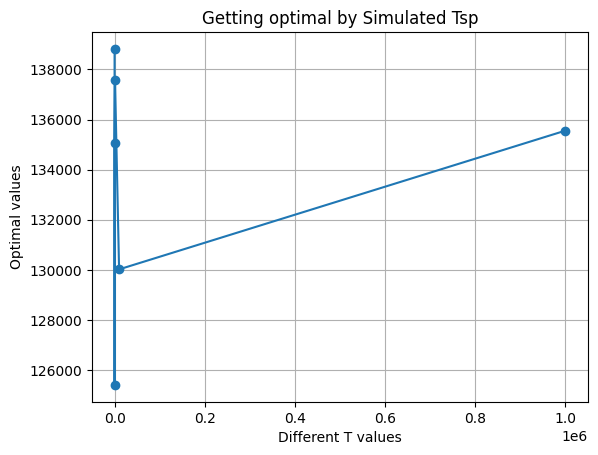

In [37]:
#ploting values of T and best optimal value
plt.plot(T_value,sol,marker='o')
plt.xlabel('Different T values')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)
plt.show()